In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML,display
import bar_chart_race as bcr
from mawiparse.plot2 import plot_factory, month_abs, month_percentage
from datetime import datetime
from mawiparse.tool import datetime_gen
import pandas as pd

Error: Session cannot generate requests

In [ ]:
def pp(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

def parse_by_date(d1:datetime, d2:datetime, data: list, showLog=True, showGraph=False):
    dat = pd.concat(data, axis = 1)
    date_list = datetime_gen(d1, d2)
    dat = pd.read_csv(os.path.join('res_bytes', '2020_4.csv'), index_col = 0)
    col = list(dat.columns)
    # print(col)
    ts_list = []
    for x in col:
        if datetime.fromtimestamp(int(x)) in date_list:
            # print(x)
            ts_list.append(x)
    dat = dat[ts_list]
    dat.loc['Total',:]= dat[dat.index.isin(["UDP", "TCP", "Others"])].sum(axis=0)
    dat = dat.T
    # print(dat.head())
    x = plot_factory(dat)
    
    weekend_data = plot_factory(x.weekend_info()[2])
    weekday_data = plot_factory(x.weekday_info()[2])
    if showLog is True:
        print('----------------------------------------------------------------')
        print(f"{d1.date()} ~ {d2.date()}")
        print(f"weekend info (mean, std) is: {x.weekend_info()[:2]} ")
        print(f"weekday info (mean, std) is: {x.weekday_info()[:2]} ")
        print(f"mean value ratio is {x.weekend_info()[0]/x.weekday_info()[0]}, std value ratio is {x.weekend_info()[1]/x.weekday_info()[1]}")
        print('----------------------------------------------------------------')
    if showGraph is True:
        x.get().plot()
        weekend_data.get().plot()
        weekday_data.get().plot()

    # returning four;
    return x.weekday_info()[:2], x.weekend_info()[:2]


def parse(y, m, dir_name='res_bytes', showLog=True, showGraph=False):    
    filename = os.path.join(dir_name, '{year}_{month}.csv'.format(year = y, month = m))
    x = plot_factory(filename)
    # print(x.data.head())
    abs_month = x.get(instance_name='abs')
    # abs_month.plot()
    weekend_data = plot_factory(x.weekend_info()[2])
    weekday_data = plot_factory(x.weekday_info()[2])
    if showLog is True:
        print('----------------------------------------------------------------')
        print(f"{y}-{m}")
        print(f"weekend info (mean, std) of {y}:{m} is: {x.weekend_info()[:2]} ")
        print(f"weekday info (mean, std) of {y}:{m} is: {x.weekday_info()[:2]} ")
        print(f"mean value ratio is {x.weekend_info()[0]/x.weekday_info()[0]}, std value ratio is {x.weekend_info()[1]/x.weekday_info()[1]}")
        print('----------------------------------------------------------------')
    if showGraph is True:
        x.get().plot()
        weekend_data.get().plot()
        weekday_data.get().plot()

    # returning four;
    return x.weekday_info()[:2], x.weekend_info()[:2], x.data

In [ ]:
total = pd.read_csv('covid_data/covid_jpn_total.csv')
total["Active"] = total.apply(lambda row: row.Positive - row.Discharged, axis=1)

# mask = (total['Date'] > '2019-12-31') & (total['Date'] <= '2020-12-31')
# print(total.loc[mask].shape)
# total = total.loc[mask]

fig = px.bar(total,x='Date',y='Active',labels={"index":"Number of cases","value":"Date"},title="") 
fig.show()

In [ ]:
total.head()

,Date,Location,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Active
0,2020-02-06,Domestic,16,132.0,16.0,0.0,0.0,NaN,9.0,0,3.0,0.0,4,0,NaN,NaN,12
1,2020-02-06,Returnee,9,566.0,5.0,4.0,0.0,NaN,3.0,0,2.0,0.0,0,0,NaN,NaN,9
2,2020-02-07,Domestic,16,151.0,16.0,0.0,0.0,NaN,12.0,0,0.0,0.0,4,0,NaN,NaN,12
3,2020-02-07,Returnee,9,566.0,6.0,3.0,0.0,NaN,4.0,0,2.0,0.0,0,0,NaN,NaN,9
4,2020-02-10,Domestic,16,174.0,16.0,0.0,0.0,NaN,7.0,0,0.0,0.0,9,0,NaN,NaN,7


In [ ]:

def get_df(y, m):
    _, _, md = parse(y, m, showLog = False)
    md['Date'] = md.index
    md.reset_index(inplace=True)
    md["Date"] = md.apply(lambda row: datetime.fromtimestamp(int(row.Date)), axis=1)
    md['Total'] = md.apply(lambda row: row.Total / 1e6 , axis = 1)
    return md

y = 2019
df_li = []

for i in range(7, 13):
    df_li.append(get_df(y, i))
y = 2020
for i in range(1, 13):
    df_li.append(get_df(y, i))
y = 2021
for i in range(1, 7):
    df_li.append(get_df(y, i))
    
data = pd.concat(df_li, axis=0)
data.shape


(731, 7)

In [ ]:
fig = px.bar(data,x='Date',y='Total',labels={"index":"Number of cases","value":"Date"},title="") 
fig.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/polynomial.py:627: RuntimeWarning:

overflow encountered in multiply

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:256: RankWarning:

Polyfit may be poorly conditioned



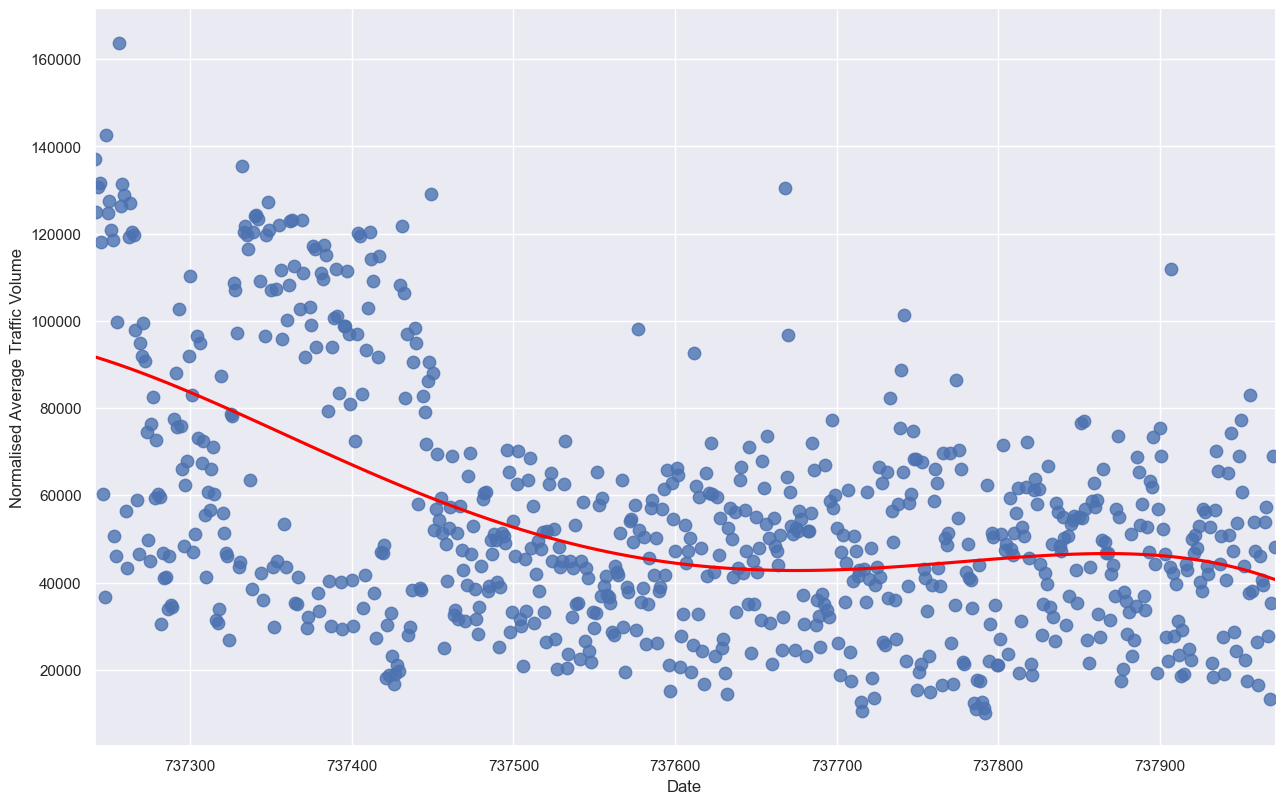

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
data['date_n'] = pd.to_datetime(data['Date']).apply(lambda date: date.toordinal())
data.head()

ax = sns.lmplot(x="date_n", y="Total", data=data,
                 scatter_kws={"s": 80},
                 order=50, ci=None, height=8, aspect=1.6, line_kws={'color': 'red'}
)
ax.set(ylabel='Normalised Average Traffic Volume', xlabel='Date')


[Text(0, 0.5, 'Active case'), Text(0.5, 0, 'Date')]

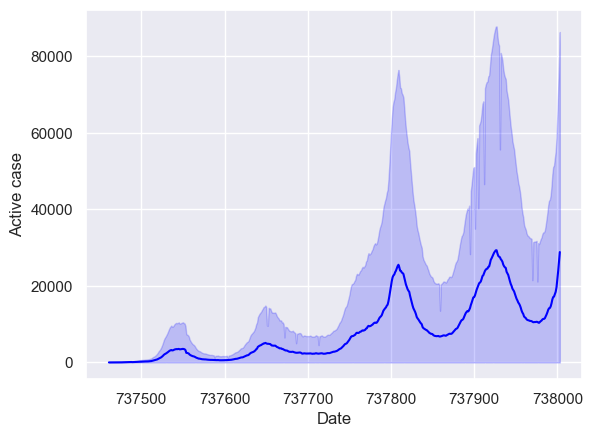

In [ ]:
total['date_n'] = pd.to_datetime(total['Date']).apply(lambda date: date.toordinal())
data.head()

ax = sns.lineplot(x="date_n", y="Active", data=total, color='blue')
ax.set(ylabel='Active case', xlabel='Date')

In [ ]:
data_x = pd.merge(data, total, on="date_n")


In [ ]:
data.shape

(731, 8)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/polynomial.py:627: RuntimeWarning:

overflow encountered in multiply

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:256: RankWarning:

Polyfit may be poorly conditioned



([<matplotlib.axis.XTick at 0x7fa8931aee48>,
  ...],
 [Text(737461, 0, '2020-02-06'),
  Text(737461, 0, '2020-02-06'),
  Text(737462, 0, '2020-02-07'),
  Text(737462, 0, '2020-02-07'),
  Text(737465, 0, '2020-02-10'),
  Text(737465, 0, '2020-02-10'),
  Text(737467, 0, '2020-02-12'),
  Text(737467, 0, '2020-02-12'),
  Text(737468, 0, '2020-02-13'),
  Text(737468, 0, '2020-02-13'),
  Text(737469, 0, '2020-02-14'),
  Text(737469, 0, '2020-02-14'),
  Text(737472, 0, '2020-02-17'),
  Text(737472, 0, '2020-02-17'),
  Text(737473, 0, '2020-02-18'),
  Text(737473, 0, '2020-02-18'),
  Text(737474, 0, '2020-02-19'),
  Text(737474, 0, '2020-02-19'),
  Text(737475, 0, '2020-02-20'),
  Text(737475, 0, '2020-02-20'),
  Text(737476, 0, '2020-02-21'),
  Text(737476, 0, '2020-02-21'),
  Text(737477, 0, '2020-02-22'),
  Text(737477, 0, '2020-02-22'),
  Text(737478, 0, '2020-02-23'),
  Text(737478, 0, '2020-02-23'),
  Text(737479, 0, '2020-02-24'),
  Text(737479, 0, '2020-02-24'),
  Text(737480, 0, '2020

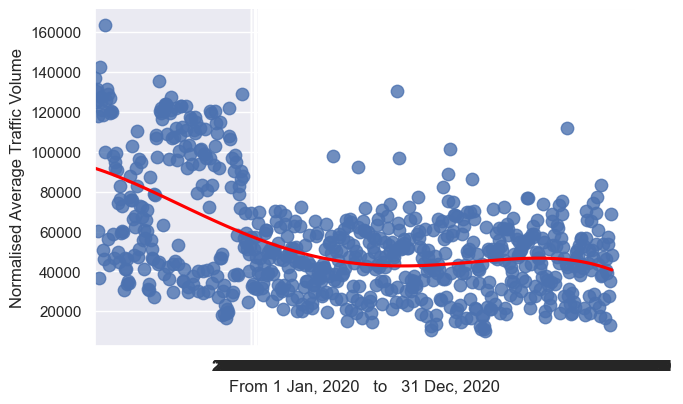

In [ ]:
# import matplotlib
# ax = sns.lmplot(x="date_n", y="Total", data=data,
#                  scatter_kws={"s": 80},
#                  order=50, ci=None, height=4, aspect=1.6, line_kws={'color': 'red'},
# )
# ax.set(ylabel='Normalised Average Traffic Volume', xlabel='From 1 Jan, 2020   to   31 Dec, 2020')

# plt.xticks(total['date_n'],total['Date'])


In [ ]:
data_x.to_csv("data_x.csv")

Error: Session cannot generate requests